In [11]:
train_dir = '/Users/user/OneDrive/Documents/archive/train'
test_dir = '/Users/user/OneDrive/Documents/archive/test'

In [12]:
import os
print(len(os.listdir('/Users/user/OneDrive/Documents/archive/train/Butterflies')))
print(len(os.listdir('/Users/user/OneDrive/Documents/archive/train/Moth')))
print(len(os.listdir('/Users/user/OneDrive/Documents/archive/test/Butterflies')))
print(len(os.listdir('/Users/user/OneDrive/Documents/archive/test/Moth')))

101
100
77
71


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  
    subset='training'  
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 
)

validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation' 
)

Found 161 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [14]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    
pretrained_model = tf.keras.applications.ResNet50(include_top = False, 
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

In [15]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [16]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
6/6 [==============================] - 12s 2s/step - loss: 4.0539 - accuracy: 0.4845 - val_loss: 1.3360 - val_accuracy: 0.5000
Epoch 2/3
6/6 [==============================] - 9s 2s/step - loss: 2.4242 - accuracy: 0.5342 - val_loss: 2.0260 - val_accuracy: 0.5000
Epoch 3/3
6/6 [==============================] - 10s 2s/step - loss: 1.5556 - accuracy: 0.5528 - val_loss: 2.3710 - val_accuracy: 0.5000


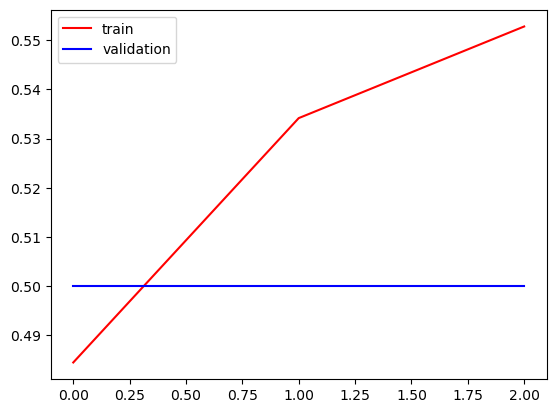

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

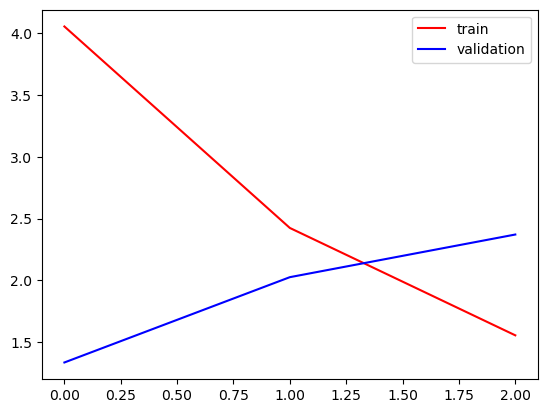

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 148 images belonging to 2 classes.


In [21]:
predictions = resnet_model.predict(test_data)
print(predictions)

5/5 [==============================] - 7s 1s/step
[[0.99681234]
 [0.9880304 ]
 [0.97089374]
 [0.98682296]
 [0.9990813 ]
 [0.9888342 ]
 [0.99364096]
 [0.9847451 ]
 [0.9888064 ]
 [0.98853624]
 [0.99106103]
 [0.96555454]
 [0.9867663 ]
 [0.9804527 ]
 [0.9965213 ]
 [0.9960218 ]
 [0.99639314]
 [0.98267376]
 [0.9828705 ]
 [0.98931265]
 [0.99188983]
 [0.9884983 ]
 [0.98829496]
 [0.9965124 ]
 [0.97924185]
 [0.9973826 ]
 [0.9911857 ]
 [0.99501675]
 [0.9870935 ]
 [0.9885997 ]
 [0.98474985]
 [0.98572874]
 [0.99087185]
 [0.99688894]
 [0.97969055]
 [0.9962288 ]
 [0.9806158 ]
 [0.997511  ]
 [0.9929209 ]
 [0.993042  ]
 [0.9634493 ]
 [0.9950115 ]
 [0.9629695 ]
 [0.0066069 ]
 [0.97945863]
 [0.97826105]
 [0.9971357 ]
 [0.99120355]
 [0.9876382 ]
 [0.99602425]
 [0.99745107]
 [0.9884957 ]
 [0.9981121 ]
 [0.9943045 ]
 [0.9986196 ]
 [0.98894036]
 [0.9515923 ]
 [0.99749124]
 [0.9894088 ]
 [0.9776269 ]
 [0.99329925]
 [0.9884029 ]
 [0.9934854 ]
 [0.99024636]
 [0.99712664]
 [0.98361254]
 [0.98796093]
 [0.9748865 

In [22]:
len(predictions)


148

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 1 76]
 [ 0 71]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        77
           1       0.48      1.00      0.65        71

    accuracy                           0.49       148
   macro avg       0.74      0.51      0.34       148
weighted avg       0.75      0.49      0.33       148

